In [1]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import feature_extraction, model_selection, pipeline, manifold, preprocessing, feature_selection
import gensim
import gensim.downloader as gensim_api

df = pd.read_csv('XLcombined.csv')
#data.drop(['score', 'length', 'tokenized', 'selftext', 'tokenjoined', 'remrejoined', 'lemmarejoined'], inplace = True, axis = 1)
df

,score,created_utc,selftext,covid,clean,clean2,length,token,rem2,lem2,remlem2
0,5,2017-03-01,I've used this app called 'Relax Melodies' for...,0,I've used this app called 'Relax Melodies' for...,i ve used this app called relax melodies for o...,886,i ve used this app called relax melodies for o...,used app called relax melodies two years app i...,i ve used this app called relax melody for ove...,used app called relax melody two year app incl...
1,2,2017-03-01,I felt reasonably tired at my bed time. I got ...,0,I felt reasonably tired at my bed time. I got ...,i felt reasonably tired at my bed time i got i...,214,i felt reasonably tired at my bed time i got i...,felt reasonably tired bed time got bed closed ...,i felt reasonably tired at my bed time i got i...,felt reasonably tired bed time got bed closed ...
2,10,2017-03-01,And to hear how they slept poorly the next day...,0,And to hear how they slept poorly the next day...,and to hear how they slept poorly the next day...,61,and to hear how they slept poorly the next day...,hear slept poorly next day luxury,and to hear how they slept poorly the next day...,hear slept poorly next day luxury
3,5,2017-03-01,"Whenever it is warm outside, there is a bird t...",0,"Whenever it is warm outside, there is a bird t...",whenever it is warm outside there is a bird th...,255,whenever it is warm outside there is a bird th...,whenever warm outside bird chirps outside wind...,whenever it is warm outside there is a bird th...,whenever warm outside bird chirp outside windo...
4,3,2017-03-01,I was on 20-25mg Mirtazapine (Remeron) over th...,0,I was on 20-25mg Mirtazapine (Remeron) over th...,i was on mg mirtazapine remeron over the ...,977,i was on mg mirtazapine remeron over the past ...,mg mirtazapine remeron past years months ago b...,i wa on mg mirtazapine remeron over the past f...,mg mirtazapine remeron past year month ago beg...
...,...,...,...,...,...,...,...,...,...,...,...
18394,4,2021-02-27,"I’ve been at day 4, not many times, it’s where...",1,"I’ve been at day 4, not many times, it’s where...",i ve been at day not many times it s where i...,512,i ve been at day not many times it s where i m...,day many times incredible moodiness overwhelmi...,i ve been at day not many time it s where i m ...,day many time incredible moodiness overwhelmin...
18395,1,2021-02-27,"Hi, everyone I’m a new poster in this sub but ...",1,"Hi, everyone I’m a new poster in this sub but ...",hi everyone i m a new poster in this sub but i...,1469,hi everyone i m a new poster in this sub but i...,hi everyone new poster sub trying see anyone e...,hi everyone i m a new poster in this sub but i...,hi everyone new poster sub trying see anyone e...
18396,3,2021-02-27,"I have a very hard time falling asleep, I can ...",1,"I have a very hard time falling asleep, I can ...",i have a very hard time falling asleep i can b...,183,i have a very hard time falling asleep i can b...,hard time falling asleep exhausted cant switch...,i have a very hard time falling asleep i can b...,hard time falling asleep exhausted cant switch...
18397,17,2021-02-28,anyone else rly want to sleep and feel tired b...,1,anyone else rly want to sleep and feel tired b...,anyone else rly want to sleep and feel tired b...,107,anyone else rly want to sleep and feel tired b...,anyone else rly want sleep feel tired get anxi...,anyone else rly want to sleep and feel tired b...,anyone else rly want sleep feel tired get anxi...


In [7]:
import nltk

def tokenize(column):
    """Tokenizes a Pandas dataframe column and returns a list of tokens.

    Args:
        column: Pandas dataframe column (i.e. df['text']).

    Returns:
        tokens (list): Tokenized list, i.e. [Donald, Trump, tweets]

    """

    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]

In [8]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
#Lemmatization

def apply_lemmatize(tokenized_column):
    """Return a list of tokens with lemmatization applied.

    Args:
        column: Pandas dataframe column of tokenized data with stopwords removed.

    Returns:
        tokens (list): Tokenized list with words lemmatized.

    """

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokenized_column]

In [ ]:
#df.rename(columns={"remlem2": "text"})

In [10]:
#df['created_utc'] = df['created_utc'].astype('datetime64[ns]')
df['created_utc'] = df['created_utc'].astype('string')
#combi['created_utc'].dt.strftime('%d/%m/%y')
df['remlem2'] = df['remlem2'].astype("string")

In [ ]:
df.dtypes

score           int64
created_utc    string
selftext       object
covid           int64
clean          object
clean2         object
length          int64
token          object
rem2           object
lem2           object
remlem2        string
dtype: object

In [11]:
import nltk
from nltk.stem import WordNetLemmatizer
import pandas as pd
from nltk.corpus import stopwords

nltk.download('punkt')
df['words'] = df.apply(lambda x: tokenize(x['remlem2']), axis=1)#stopwords removed & lemmatized >> remlem2

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#df["created_utc"] = pd.to_datetime(df["created_utc"])

In [12]:
df["created_utc"]
df['year'] = df['created_utc'].astype(str).str[0:4]
df['ym'] = df['created_utc'].astype(str).str[0:7]
df

,score,created_utc,selftext,covid,clean,clean2,length,token,rem2,lem2,remlem2,words,year,ym
0,5,2017-03-01,I've used this app called 'Relax Melodies' for...,0,I've used this app called 'Relax Melodies' for...,i ve used this app called relax melodies for o...,886,i ve used this app called relax melodies for o...,used app called relax melodies two years app i...,i ve used this app called relax melody for ove...,used app called relax melody two year app incl...,"[used, app, called, relax, melody, two, year, ...",2017,2017-03
1,2,2017-03-01,I felt reasonably tired at my bed time. I got ...,0,I felt reasonably tired at my bed time. I got ...,i felt reasonably tired at my bed time i got i...,214,i felt reasonably tired at my bed time i got i...,felt reasonably tired bed time got bed closed ...,i felt reasonably tired at my bed time i got i...,felt reasonably tired bed time got bed closed ...,"[felt, reasonably, tired, bed, time, got, bed,...",2017,2017-03
2,10,2017-03-01,And to hear how they slept poorly the next day...,0,And to hear how they slept poorly the next day...,and to hear how they slept poorly the next day...,61,and to hear how they slept poorly the next day...,hear slept poorly next day luxury,and to hear how they slept poorly the next day...,hear slept poorly next day luxury,"[hear, slept, poorly, next, day, luxury]",2017,2017-03
3,5,2017-03-01,"Whenever it is warm outside, there is a bird t...",0,"Whenever it is warm outside, there is a bird t...",whenever it is warm outside there is a bird th...,255,whenever it is warm outside there is a bird th...,whenever warm outside bird chirps outside wind...,whenever it is warm outside there is a bird th...,whenever warm outside bird chirp outside windo...,"[whenever, warm, outside, bird, chirp, outside...",2017,2017-03
4,3,2017-03-01,I was on 20-25mg Mirtazapine (Remeron) over th...,0,I was on 20-25mg Mirtazapine (Remeron) over th...,i was on mg mirtazapine remeron over the ...,977,i was on mg mirtazapine remeron over the past ...,mg mirtazapine remeron past years months ago b...,i wa on mg mirtazapine remeron over the past f...,mg mirtazapine remeron past year month ago beg...,"[mg, mirtazapine, remeron, past, year, month, ...",2017,2017-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18394,4,2021-02-27,"I’ve been at day 4, not many times, it’s where...",1,"I’ve been at day 4, not many times, it’s where...",i ve been at day not many times it s where i...,512,i ve been at day not many times it s where i m...,day many times incredible moodiness overwhelmi...,i ve been at day not many time it s where i m ...,day many time incredible moodiness overwhelmin...,"[day, many, time, incredible, moodiness, overw...",2021,2021-02
18395,1,2021-02-27,"Hi, everyone I’m a new poster in this sub but ...",1,"Hi, everyone I’m a new poster in this sub but ...",hi everyone i m a new poster in this sub but i...,1469,hi everyone i m a new poster in this sub but i...,hi everyone new poster sub trying see anyone e...,hi everyone i m a new poster in this sub but i...,hi everyone new poster sub trying see anyone e...,"[hi, everyone, new, poster, sub, trying, see, ...",2021,2021-02
18396,3,2021-02-27,"I have a very hard time falling asleep, I can ...",1,"I have a very hard time falling asleep, I can ...",i have a very hard time falling asleep i can b...,183,i have a very hard time falling asleep i can b...,hard time falling asleep exhausted cant switch...,i have a very hard time falling asleep i can b...,hard time falling asleep exhausted cant switch...,"[hard, time, falling, asleep, exhausted, cant,...",2021,2021-02
18397,17,2021-02-28,anyone else rly want to sleep and feel tired b...,1,anyone else rly want to sleep and feel tired b...,anyone else rly want to sleep and feel tired b...,107,anyone else rly want to sleep and feel tired b...,anyone else rly want sleep feel tired get anxi...,anyone else rly want to sleep and feel tired b...,anyone else rly want sleep feel tired get anxi...,"[a

In [13]:
df.columns

Index(['score', 'created_utc', 'selftext', 'covid', 'clean', 'clean2',
       'length', 'token', 'rem2', 'lem2', 'remlem2', 'words', 'year', 'ym'],
      dtype='object')

In [14]:
m = list(df['ym'].unique())
print(m)

['2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02']


In [15]:
d = df[['ym', 'words', 'remlem2', 'covid', 'length']]
d = d.rename(columns={"remlem2": "text", "covid": "y"})

In [16]:
##DATAFRAMES PER MONTH

a1 = d.loc[d['ym'] == '2017-03'][['text', 'ym', 'length']]
a2 = d.loc[d['ym'] == '2017-04'][['text', 'ym', 'length']]
a3 = d.loc[d['ym'] == '2017-05'][['text', 'ym', 'length']]
a4 = d.loc[d['ym'] == '2017-06'][['text', 'ym', 'length']]
a5 = d.loc[d['ym'] == '2017-07'][['text', 'ym', 'length']]
a6 = d.loc[d['ym'] == '2017-08'][['text', 'ym', 'length']]
a7 = d.loc[d['ym'] == '2017-09'][['text', 'ym', 'length']]
a8 = d.loc[d['ym'] == '2017-10'][['text', 'ym', 'length']]
a9 = d.loc[d['ym'] == '2017-11'][['text', 'ym', 'length']]
a10 = d.loc[d['ym'] == '2017-12'][['text', 'ym', 'length']]

a11 = d.loc[d['ym'] == '2018-01'][['text', 'ym', 'length']]
a12 = d.loc[d['ym'] == '2018-02'][['text', 'ym', 'length']]
a13 = d.loc[d['ym'] == '2018-03'][['text', 'ym', 'length']]
a14 = d.loc[d['ym'] == '2018-04'][['text', 'ym', 'length']]
a15 = d.loc[d['ym'] == '2018-05'][['text', 'ym', 'length']]
a16 = d.loc[d['ym'] == '2018-06'][['text', 'ym', 'length']]
a17 = d.loc[d['ym'] == '2018-07'][['text', 'ym', 'length']]
a18 = d.loc[d['ym'] == '2018-08'][['text', 'ym', 'length']]
a19 = d.loc[d['ym'] == '2018-09'][['text', 'ym', 'length']]
a20 = d.loc[d['ym'] == '2018-10'][['text', 'ym', 'length']]

a21 = d.loc[d['ym'] == '2018-11'][['text', 'ym', 'length']]
a22 = d.loc[d['ym'] == '2018-12'][['text', 'ym', 'length']]
a23 = d.loc[d['ym'] == '2019-01'][['text', 'ym', 'length']]
a24 = d.loc[d['ym'] == '2019-02'][['text', 'ym', 'length']]
a25 = d.loc[d['ym'] == '2019-03'][['text', 'ym', 'length']]
a26 = d.loc[d['ym'] == '2019-04'][['text', 'ym', 'length']]
a27 = d.loc[d['ym'] == '2019-05'][['text', 'ym', 'length']]
a28 = d.loc[d['ym'] == '2019-06'][['text', 'ym', 'length']]
a29 = d.loc[d['ym'] == '2019-07'][['text', 'ym', 'length']]
a30 = d.loc[d['ym'] == '2019-08'][['text', 'ym', 'length']]

a31 = d.loc[d['ym'] == '2019-09'][['text', 'ym', 'length']]
a32 = d.loc[d['ym'] == '2019-10'][['text', 'ym', 'length']]
a33 = d.loc[d['ym'] == '2019-11'][['text', 'ym', 'length']]
a34 = d.loc[d['ym'] == '2019-12'][['text', 'ym', 'length']]
a35 = d.loc[d['ym'] == '2020-01'][['text', 'ym', 'length']]
a36 = d.loc[d['ym'] == '2020-02'][['text', 'ym', 'length']]
a37 = d.loc[d['ym'] == '2020-03'][['text', 'ym', 'length']]
a38 = d.loc[d['ym'] == '2020-04'][['text', 'ym', 'length']]
a39 = d.loc[d['ym'] == '2020-05'][['text', 'ym', 'length']]
a40 = d.loc[d['ym'] == '2020-06'][['text', 'ym', 'length']]

a41 = d.loc[d['ym'] == '2020-07'][['text', 'ym', 'length']]
a42 = d.loc[d['ym'] == '2020-08'][['text', 'ym', 'length']]
a43 = d.loc[d['ym'] == '2020-09'][['text', 'ym', 'length']]
a44 = d.loc[d['ym'] == '2020-10'][['text', 'ym', 'length']]
a45 = d.loc[d['ym'] == '2020-11'][['text', 'ym', 'length']]
a46 = d.loc[d['ym'] == '2020-12'][['text', 'ym', 'length']]
a47 = d.loc[d['ym'] == '2021-01'][['text', 'ym', 'length']]
a48= d.loc[d['ym'] == '2021-02'][['text', 'ym', 'length']]


In [17]:
### AVERAGE WORDS PER MONTH...

avwords = [sum(a1['length'])/len(a1), sum(a2['length'])/len(a2), sum(a3['length'])/len(a3), sum(a4['length'])/len(a4),
           sum(a5['length'])/len(a5), sum(a6['length'])/len(a6), sum(a7['length'])/len(a7), sum(a8['length'])/len(a8),
           sum(a9['length'])/len(a9), sum(a10['length'])/len(a10), sum(a11['length'])/len(a11), sum(a12['length'])/len(a12),
           sum(a13['length'])/len(a13), sum(a14['length'])/len(a14), sum(a15['length'])/len(a15), sum(a16['length'])/len(a16),
           sum(a17['length'])/len(a17), sum(a18['length'])/len(a18), sum(a19['length'])/len(a19), sum(a20['length'])/len(a20),
           sum(a21['length'])/len(a21), sum(a22['length'])/len(a22), sum(a23['length'])/len(a23), sum(a24['length'])/len(a24),
           sum(a25['length'])/len(a25), sum(a26['length'])/len(a26), sum(a27['length'])/len(a27), sum(a28['length'])/len(a28),
           sum(a29['length'])/len(a29), sum(a30['length'])/len(a30), sum(a31['length'])/len(a31), sum(a32['length'])/len(a32),
           sum(a33['length'])/len(a33), sum(a34['length'])/len(a34), sum(a35['length'])/len(a35), sum(a36['length'])/len(a36),
           sum(a37['length'])/len(a37), sum(a38['length'])/len(a38), sum(a39['length'])/len(a39), sum(a40['length'])/len(a40),
           sum(a41['length'])/len(a41), sum(a42['length'])/len(a42), sum(a43['length'])/len(a43), sum(a44['length'])/len(a44),
           sum(a45['length'])/len(a45), sum(a46['length'])/len(a46), sum(a47['length'])/len(a47), sum(a48['length'])/len(a48)

           ]

In [18]:
avwords2 = (list(map(int, avwords)))
'''[764,
 836,
 661,
 777,
 817,
 705,
 1020,
 764,
 783,
 835,
 630,
 766,
 787,
 750,
 748,
 807,
 722,
 710,
 702,
 754,
 634,
 648,
 786,
 685,
 655,
 712,
 656,
 656,
 588,
 600,
 607,
 615,
 656,
 603,
 617,
 639,
 592,
 622,
 645,
 694,
 651,
 704,
 704,
 672,
 692,
 722,
 681,
 817]'''

'[764,\n 836,\n 661,\n 777,\n 817,\n 705,\n 1020,\n 764,\n 783,\n 835,\n 630,\n 766,\n 787,\n 750,\n 748,\n 807,\n 722,\n 710,\n 702,\n 754,\n 634,\n 648,\n 786,\n 685,\n 655,\n 712,\n 656,\n 656,\n 588,\n 600,\n 607,\n 615,\n 656,\n 603,\n 617,\n 639,\n 592,\n 622,\n 645,\n 694,\n 651,\n 704,\n 704,\n 672,\n 692,\n 722,\n 681,\n 817]'

In [20]:
#number of posts each month

posts = [(len(a1)), len(a2), len(a3), len(a4), len(a5), len(a6), len(a7), len(a8), len(a9), len(a10), len(a11), len(a12),
        len(a13), len(a14), len(a15), len(a16), len(a17), len(a18), len(a19), len(a20), len(a21), len(a22), len(a23), len(a24),
        len(a25), len(a26), len(a27), len(a28), len(a29), len(a30), len(a31), len(a32), len(a33), len(a34), len(a35), len(a36),
        len(a37), len(a38), len(a39), len(a40), len(a41), len(a42), len(a43), len(a44), len(a45), len(a46), len(a47), len(a48)]

In [21]:
## NUM OF WORDS PER MONTH

totw = np.array(posts) * np.array(avwords)
totw = (list(totw))
totw2 = (list(map(int, totw)))
totw2
'''[93240,
 87814,
 74714,
 101118,
 131675,
 103060,
 159192,
 120018,
 129198,
 133657,
 140573,
 148749,
 165452,
 167379,
 143653,
 175307,
 208111,
 225325,
 208519,
 253559,
 173909,
 190667,
 337589,
 235202,
 281770,
 276365,
 246888,
 265739,
 278164,
 333161,
 265343,
 292962,
 282266,
 319409,
 423554,
 381091,
 343062,
 469048,
 398793,
 395159,
 402633,
 410039,
 400730,
 406990,
 376543,
 432706,
 488009,
 501038]'''

'[93240,\n 87814,\n 74714,\n 101118,\n 131675,\n 103060,\n 159192,\n 120018,\n 129198,\n 133657,\n 140573,\n 148749,\n 165452,\n 167379,\n 143653,\n 175307,\n 208111,\n 225325,\n 208519,\n 253559,\n 173909,\n 190667,\n 337589,\n 235202,\n 281770,\n 276365,\n 246888,\n 265739,\n 278164,\n 333161,\n 265343,\n 292962,\n 282266,\n 319409,\n 423554,\n 381091,\n 343062,\n 469048,\n 398793,\n 395159,\n 402633,\n 410039,\n 400730,\n 406990,\n 376543,\n 432706,\n 488009,\n 501038]'

In [22]:
avwords

'''[764.2622950819672,
 836.3238095238095,
 661.1858407079646,
 777.8307692307692,
 817.8571428571429,
 705.8904109589041,
 1020.4615384615385,
 764.4458598726114,
 783.0181818181818,
 835.35625,
 630.3721973094171,
 766.7474226804123,
 787.8666666666667,
 750.5784753363229,
 748.1927083333334,
 807.8663594470046,
 722.6076388888889,
 710.8044164037855,
 702.087542087542,
 754.639880952381,
 634.7043795620438,
 648.5272108843537,
 786.920745920746,
 685.7201166180758,
 655.2790697674419,
 712.2809278350516,
 656.6170212765958,
 656.1456790123457,
 588.0845665961945,
 600.2900900900901,
 607.1922196796339,
 615.4663865546219,
 656.4325581395349,
 603.7977315689981,
 617.4256559766764,
 639.4144295302013,
 592.5077720207254,
 622.079575596817,
 645.2961165048544,
 694.4797891036907,
 651.5097087378641,
 704.5343642611684,
 704.2706502636204,
 672.7107438016529,
 692.1746323529412,
 722.380634390651,
 681.5768156424581,
 817.3539967373573]'''

'[764.2622950819672,\n 836.3238095238095,\n 661.1858407079646,\n 777.8307692307692,\n 817.8571428571429,\n 705.8904109589041,\n 1020.4615384615385,\n 764.4458598726114,\n 783.0181818181818,\n 835.35625,\n 630.3721973094171,\n 766.7474226804123,\n 787.8666666666667,\n 750.5784753363229,\n 748.1927083333334,\n 807.8663594470046,\n 722.6076388888889,\n 710.8044164037855,\n 702.087542087542,\n 754.639880952381,\n 634.7043795620438,\n 648.5272108843537,\n 786.920745920746,\n 685.7201166180758,\n 655.2790697674419,\n 712.2809278350516,\n 656.6170212765958,\n 656.1456790123457,\n 588.0845665961945,\n 600.2900900900901,\n 607.1922196796339,\n 615.4663865546219,\n 656.4325581395349,\n 603.7977315689981,\n 617.4256559766764,\n 639.4144295302013,\n 592.5077720207254,\n 622.079575596817,\n 645.2961165048544,\n 694.4797891036907,\n 651.5097087378641,\n 704.5343642611684,\n 704.2706502636204,\n 672.7107438016529,\n 692.1746323529412,\n 722.380634390651,\n 681.5768156424581,\n 817.3539967373573]'

In [23]:
df['words'] = df.apply(lambda x: tokenize(x['remlem2']), axis=1)

In [ ]:
'''
#0-122, 122-227, 227-339 , 339-469, 469-630, 630-776, 776- 932, 932-1089, 1089-1254, 1254-1414, 1414-1637, 1637-1831
#1831-2041, 2041-2264, 2264-2456, 2456-2673, 2673-2961, 2961-3278, 3278-3575, 3575-3911, 3911-4185, 4185-4479,
4479-4908, 4908-5251, 5251-5681, 5681-6069, 6069-6445, 6445-6850, 6850-7323, 7323-7878, 7878-8315, 8315-8791,
8791-9221, 9221-9750, 9750-10436, 10436-11032, 11032-11611, 11611-12365, 12365-12983, 12983-13552, 13552-14170,
14170-14752, 14752-15321, 15321-15926, 15926-16470, 16470-17069, 17069-17785, 17785-18399'''

In [24]:
import statistics

la1 = df['length'][0:121]

#a5 = d.loc[d['ym'] == '2017-07'][['text', 'ym']]


In [25]:
bef = d.loc[d['y'] == 0][['text', 'ym']]
af = d.loc[d['y'] == 1][['text', 'ym']]

In [ ]:
'''word = "apple"
count = 0
with open("temp.txt", 'r') as f:
    for line in f:
        words = line.split()
        for i in words:
            if(i==word):
                count=count+1
print("Occurrences of the word", word, ":", count)'''

In [ ]:
#df['fall'] = df.apply(lambda x: count(x['text']), axis=1)

In [ ]:
'''def makedic(text):
    wordfreq = {}
    for sentence in text:
        tokens = nltk.word_tokenize(sentence)
        for token in tokens:
            if token not in wordfreq.keys():
                wordfreq[token] = 1
            else:
                wordfreq[token] += 1
    wordfreq = {k:v for k,v in wordfreq.items()}
    return wordfreq '''

'def makedic(text):\n    wordfreq = {}\n    for sentence in text:\n        tokens = nltk.word_tokenize(sentence)\n        for token in tokens:\n            if token not in wordfreq.keys():\n                wordfreq[token] = 1\n            else:\n                wordfreq[token] += 1\n    wordfreq = {k:v for k,v in wordfreq.items()}\n    return wordfreq '

In [26]:
d['text']

0        used app called relax melody two year app incl...
1        felt reasonably tired bed time got bed closed ...
2                        hear slept poorly next day luxury
3        whenever warm outside bird chirp outside windo...
4        mg mirtazapine remeron past year month ago beg...
                               ...                        
18394    day many time incredible moodiness overwhelmin...
18395    hi everyone new poster sub trying see anyone e...
18396    hard time falling asleep exhausted cant switch...
18397    anyone else rly want sleep feel tired get anxi...
18398    fella around time last year first bout insomni...
Name: text, Length: 18399, dtype: string

In [27]:
def makedic(text):
    wordfreq = {}
    for sentence in text:
        tokens = nltk.word_tokenize(sentence)
        for token in tokens:
            if token not in wordfreq.keys():
                wordfreq[token] = 1
            else:
                wordfreq[token] += 1
    wordfreq = {k:v for k,v in wordfreq.items()}
    return wordfreq

In [ ]:
#d['dic'] = d.apply(lambda x: makedic(x['text']), axis=1)

In [28]:
befdic = makedic(bef.text)
afdic = makedic(af.text)
a1dic = makedic(a1.text)
a2dic = makedic(a2.text)
a3dic = makedic(a3.text)
a4dic = makedic(a4.text)
a5dic = makedic(a5.text)
a6dic = makedic(a6.text)
a7dic = makedic(a7.text)
a8dic = makedic(a8.text)
a9dic = makedic(a9.text)
a10dic = makedic(a10.text)

a11dic = makedic(a11.text)
a12dic = makedic(a12.text)
a13dic = makedic(a13.text)
a14dic = makedic(a14.text)
a15dic = makedic(a15.text)
a16dic = makedic(a16.text)
a17dic = makedic(a17.text)
a18dic = makedic(a18.text)
a19dic = makedic(a19.text)
a20dic = makedic(a20.text)

a21dic = makedic(a21.text)
a22dic = makedic(a22.text)
a23dic = makedic(a23.text)
a24dic = makedic(a24.text)
a25dic = makedic(a25.text)
a26dic = makedic(a26.text)
a27dic = makedic(a27.text)
a28dic = makedic(a28.text)
a29dic = makedic(a29.text)
a30dic = makedic(a30.text)

a31dic = makedic(a31.text)
a32dic = makedic(a32.text)
a33dic = makedic(a33.text)
a34dic = makedic(a34.text)
a35dic = makedic(a35.text)
a36dic = makedic(a36.text)
a37dic = makedic(a37.text)
a38dic = makedic(a38.text)
a39dic = makedic(a39.text)
a40dic = makedic(a40.text)

a41dic = makedic(a41.text)
a42dic = makedic(a42.text)
a43dic = makedic(a43.text)
a44dic = makedic(a44.text)
a45dic = makedic(a45.text)
a46dic = makedic(a46.text)
a47dic = makedic(a47.text)
a48dic = makedic(a48.text)

In [ ]:
(a1.text)

0      used app called relax melody two year app incl...
1      felt reasonably tired bed time got bed closed ...
2                      hear slept poorly next day luxury
3      whenever warm outside bird chirp outside windo...
4      mg mirtazapine remeron past year month ago beg...
                             ...                        
117    never good sleeper recently experiencing somet...
118    struggled insomnia year lifelong panic disorde...
119    diagnosed insomnia anything seem kind weird de...
120    recently started working minute day day week n...
121    issue sleeping adult life sleep restriction th...
Name: text, Length: 122, dtype: string

In [ ]:
'''for key in sorted(afdic):
    print(key, ':', afdic[key])'''


'''for (k,v), (k2,v2) in zip(befdic.items(), afdic.items()):
    print (k, v)'''

'for (k,v), (k2,v2) in zip(befdic.items(), afdic.items()):\n    print (k, v)'

In [29]:
comdic = {}
for k in afdic:
    for k2 in befdic:
        if k == k2:
            comdic[k] = befdic[k2], afdic[k]

In [79]:
comdic['xanax']

(255, 176)

In [30]:
befkeys = (list(befdic.keys()))
afkeys = (list(afdic.keys()))
befspes = list(set(befkeys) - set(afkeys))
afspes = list(set(afkeys) - set(befkeys))
comkey = list(set(befkeys).intersection(afkeys))
print(len(befspes), len(afspes), len(befkeys), len(afkeys), len(comkey))

7155 5413 17793 16051 10638


In [ ]:
'''word = 'health'

print(a1dic[word], a2dic[word], a3dic[word], a4dic[word], a5dic[word], a6dic[word], a7dic[word], a8dic[word],
a9dic[word], a10dic[word], a11dic[word], a12dic[word], a13dic[word], a14dic[word], a15dic[word], a16dic[word],
a17dic[word], a18dic[word], a19dic[word], a20dic[word], a21dic[word], a22dic[word], a23dic[word], a24dic[word],
a25dic[word], a26dic[word], a27dic[word], a28dic[word], a29dic[word], a30dic[word], a31dic[word], a32dic[word],
a33dic[word], a34dic[word], a35dic[word], a36dic[word], a37dic[word], a38dic[word], a39dic[word], a40dic[word],
a41dic[word], a42dic[word], a43dic[word], a44dic[word], a45dic[word], a46dic[word], a47dic[word], a48dic[word])'''

In [ ]:
word = 'worried'
print( a1dic[word], a2dic[word], a3dic[word], a4dic[word], a5dic[word], a6dic[word], a7dic[word], a8dic[word],
      a9dic[word], a10dic[word], a11dic[word], a12dic[word], a13dic[word], a14dic[word], a15dic[word], a16dic[word],
a17dic[word], a18dic[word], a19dic[word], a20dic[word], a21dic[word], a22dic[word], a23dic[word], a24dic[word],
a25dic[word], a26dic[word], a27dic[word], a28dic[word], a29dic[word], a30dic[word], a31dic[word], a32dic[word],
a33dic[word], a34dic[word], a35dic[word], a36dic[word], a37dic[word], a38dic[word], a39dic[word], a40dic[word],
a41dic[word], a42dic[word], a43dic[word], a44dic[word], a45dic[word], a46dic[word], a47dic[word], a48dic[word])

9 4 3 7 12 8 10 3 16 9 10 7 7 10 5 18 10 11 10 14 14 8 21 13 22 21 24 12 20 18 9 15 12 9 21 13 31 20 23 18 30 15 20 19 26 19 41 26


In [ ]:
'''word = 'lonely'

print(a1dic[word], a2dic[word], a3dic[word], a4dic[word], a5dic[word], a6dic[word], a7dic[word], a8dic[word],
a9dic[word], a10dic[word], a11dic[word], a12dic[word], a13dic[word], a14dic[word], a15dic[word], a16dic[word],
a17dic[word], a18dic[word], a19dic[word], a20dic[word], a21dic[word], a22dic[word], a23dic[word], a24dic[word],
a25dic[word], a26dic[word], a27dic[word], a28dic[word], a29dic[word], a30dic[word], a31dic[word], a32dic[word],
a33dic[word], a34dic[word], a35dic[word], a36dic[word], a37dic[word], a38dic[word], a39dic[word], a40dic[word],
a41dic[word], a42dic[word], a43dic[word], a44dic[word], a45dic[word], a46dic[word], a47dic[word], a48dic[word])'''

"word = 'lonely'\n\nprint(a1dic[word], a2dic[word], a3dic[word], a4dic[word], a5dic[word], a6dic[word], a7dic[word], a8dic[word],\na9dic[word], a10dic[word], a11dic[word], a12dic[word], a13dic[word], a14dic[word], a15dic[word], a16dic[word],\na17dic[word], a18dic[word], a19dic[word], a20dic[word], a21dic[word], a22dic[word], a23dic[word], a24dic[word],\na25dic[word], a26dic[word], a27dic[word], a28dic[word], a29dic[word], a30dic[word], a31dic[word], a32dic[word],\na33dic[word], a34dic[word], a35dic[word], a36dic[word], a37dic[word], a38dic[word], a39dic[word], a40dic[word],\na41dic[word], a42dic[word], a43dic[word], a44dic[word], a45dic[word], a46dic[word], a47dic[word], a48dic[word])"

In [ ]:
#comdic['pandemic'] (1, 110), comdic['covid'], comdic['quarantine'], comdic['health'] (393, 485),comdic['lockdown']
#comdic['benadryl']  (393, 239), comdic['scared'] (457, 507), comdic['worry'] (298, 302),comdic['stressed'] (232, 238)
#comdic['stress'] (646, 516), comdic['ambien'](807, 549), comdic['depression'] (565, 473), comdic['depressed'] (242, 195)
#comdic['safe'] (103, 125), comdic['fear'] (342, 369), comdic['anxiety']  (2388, 2302),comdic['anxious'] (612, 623)
#comdic['sleep'] (22060, 19885), comdic['mental'] (363, 350), comdic['insomnia'] (5554, 4513),comdic['advice'] (784, 708)
#comdic['restless'] (193, 141), #comdic['xanax'] (255, 172)
#comdic['psychologist'](53, 57)
#comdic['unconscious'](29, 37)
#comdic['shock'] (18, 27)
#comdic['coping'] (26, 35)

In [ ]:
'''trazodone': (423, 432),
 'breathing': (300, 348),
'sleeping': (3670, 3411),
'normal': (989, 856),
melatonin': (1607, 1342),
 'calm': (302, 245),
 'chronic': (340, 264),
 'pain': (336, 374),
 'migraine': (69, 105),
 'trauma': (44, 63),
'dosage': (160, 139),
 'alcohol': (278, 205),
 'panic': (404, 377),
 'trazadone': (230, 175)
 'trigger': (74, 100)
'routine': (258, 319),
'headache': (252, 265),
 '''

In [39]:
gen_tuples = list(zip(m, avwords2, posts, totw2))
gendf = pd.DataFrame(gen_tuples, columns=['Month','awwords', 'numpost', 'totalwords'])
gendf.describe()

,awwords,numpost,totalwords
count,48.000000,48.00000,48.000000
mean,706.062500,383.31250,262065.458333
std,83.780718,190.66961,121176.707996
min,588.000000,105.00000,74714.000000
25%,647.250000,206.00000,156581.250000
50%,698.000000,382.00000,259451.000000
75%,764.000000,569.00000,377680.000000
max,1020.000000,754.00000,501038.000000


In [40]:
covid = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,17,7,10,10,14,12,15,13,22,26,27]
pandemic = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,9,12,11,2,17,10,9,3,6,13,15,3]
quarantine = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,49,40,15,13,15,2,7,2,5,4,2]
lockdown = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,18,14,12,5,4,2,10,3,7,6,8]
benadryl = [5,6,6,5,7,2,3,10,13,4,6,7,2,2,8,11,18,12,15,16,9,15,19,6,14,30,18,13,18,25,16,13,13,26,12,26,20,30,15,15,12,13,11,18,17,15,20,15]
health = [4,9,0,8,6,7,7,8,7,21,7,8,4,7,4,10,16,6,15,10,6,14,29,9,24,17,7,19,17,26,13,19,10,19,30,26,21,27,33,40,33,35,27,36,43,36,46,52]

cov_tuples = list(zip(m, covid, pandemic, quarantine, lockdown, benadryl,health, avwords2,totw2))
covdf = pd.DataFrame(cov_tuples, columns=['Month','covid', 'pandemic', 'quarantine', 'lockdown', 'benadryl','health', 'awwords', 'totalwords'])
covdf

,Month,covid,pandemic,quarantine,lockdown,benadryl,health,awwords,totalwords
0,2017-03,0,0,0,0,5,4,764,93240
1,2017-04,0,0,0,0,6,9,836,87814
2,2017-05,0,0,0,0,6,0,661,74714
3,2017-06,0,0,0,0,5,8,777,101118
4,2017-07,0,0,0,0,7,6,817,131675
5,2017-08,0,0,0,0,2,7,705,103060
6,2017-09,0,0,0,0,3,7,1020,159192
7,2017-10,0,0,0,0,10,8,764,120018
8,2017-11,0,0,0,0,13,7,783,129198
9,2017-12,0,0,0,0,4,21,835,133657


In [32]:
anxious = [5,7,6,5,10,5,18,12,19,11,8,11,11,10,15,9,8,16,25,41,15,22,12,28,34,24,24,27,27,35,23,30,32,27,45,41,40,58,46,58,45,38,44,37,42,27,44,58]
anxiety = [0,32,21,29,44,29,59,43,39,62,35,47,30,85,59,62,75,81,68,90,76,56,117,80,114,123,88,112,88,116,91,105,90,112,132,155,151,199,155,157,147,168,185,159,156,154,209,175]
depression = [7,12,9,9,17,1,40,4,15,11,10,14,8,18,14,25,14,21,7,19,10,18,29,10,22,23,18,30,18,26,24,22,15,25,37,32,32,26,30,33,25,31,28,27,41,43,45,43]
depressed = [6,2,1,5,5,7,15,5,14,5,5,3,4,4,3,4,11,6,6,10,6,4,10,3,17,4,11,8,9,4,13,12,9,11,13,15,9,12,7,20,6,18,14,19,9,18,16,19]

afraid = [2,8,3,3,5,4,7,3,5,3,6,3,7,8,4,6,7,16,8,8,7,3,14,8,8,23,6,16,8,15,12,11,12,10,10,14,15,31,22,29,21,36,15,20,18,16,16,14]
scared = [4,5,4,4,10,3,13,3,4,7,10,7,12,17,6,11,14,9,22,18,9,10,12,19,35,27,22,19,21,25,15,16,18,26,30,24,21,62,37,43,34,36,38,34,28,36,42,42]
fear= [3,4,2,8,7,7,10,2,4,8,2,14,15,9,12,14,19,15,14,6,17,2,17,7,10,7,11,10,13,20,16,11,17,9,22,18,20,38,23,27,20,29,24,21,25,32,31,39]
worry = [5,2,3,2,10,5,10,3,7,8,8,4,8,16,6,4,2,17,11,8,6,5,21,15,13,12,9,3,13,12,16,15,11,8,17,23,21,20,23,20,22,10,21,18,17,19,42,29]
stress=[8,5,11,10,12,10,28,14,2,11,14,6,12,19,19,17,22,24,13,32,12,19,37,24,15,24,33,20,38,31,22,33,19,30,31,28,31,29,32,29,25,45,41,35,41,44,57,48]
stressed = [4,1,2,1,7,4,5,6,5,5,9,4,4,6,6,3,3,3,9,7,6,11,3,16,15,7,6,11,8,10,14,12,9,10,21,10,16,24,19,12,15,16,24,11,14,9,25,22]
stressful = [2,2,1,4,2,2,2,2,4,1,1,1,2,3,1,6,3,4,9,8,2,1,4,5,7,5,6,3,5,6,8,8,7,6,8,11,7,4,8,5,10,8,3,13,11,15,6,11]

ambien = [15,15,12,11,15,17,14,24,21,12,16,15,17,16,14,20,37,33,24,38,18,19,39,22,40,29,38,19,32,24,40,34,18,49,70,20,35,42,44,44,40,32,41,37,28,28,39,49]
seroquel = [5,3,1,3,6,7,4,4,10,1,5,6,8,13,3,9,7,13,8,7,9,9,14,6,23,15,14,9,8,11,7,14,12,14,19,14,17,25,22,11,14,21,34,30,22,32,27,23]
xanax = [5,7,5,3,5,4,1,3,2,7,1,4,6,4,2,5,10,24,13,11,4,5,10,7,19,6,14,16,5,7,8,12,8,12,11,18,6,18,15,23,13,7,6,7,19,7,12,10]

helpp =[44,61,16,55,76,56,65,72,67,57,69,80,70,68,56,87,119,123,98,144,77,73,146,132,135,138,109,136,143,167,132,121,133,142,192,193,150,245,205,218,188,220,207,167,204,223,237,272]
feel = [67,61,52,78,80,63,108,87,86,90,102,104,98,118,95,120,142,158,144,170,140,158,214,180,239,210,163,218,233,291,206,250,232,228,326,318,293,319,370,317,268,337,327,350,303,333,424,410]
hope =[7,9,2,8,7,5,17,14,13,11,15,24,9,16,13,17,20,20,23,18,19,18,28,20,27,24,18,30,22,31,13,27,23,23,46,38,35,44,36,31,56,42,49,50,33,57,39,49]
advice = [10,10,15,7,19,23,9,17,22,6,11,15,16,21,19,19,24,24,36,27,13,17,39,26,32,23,33,24,44,33,31,34,35,50,49,60,39,61,44,43,50,53,42,54,32,59,56,66]
safe = [3,0,5,5,4,1,2,0,4,1,5,0,3,0,3,2,3,3,3,5,0,2,4,5,4,4,4,3,4,6,3,3,4,5,7,11,13,6,9,16,3,4,5,6,7,11,16,11]


mental = [4,1,2,4,3,6,18,9,2,9,11,8,11,3,7,10,18,7,14,16,11,14,27,8,15,19,8,8,14,20,18,16,11,11,27,17,17,23,35,17,27,32,21,22,27,29,16,40]
insomnia = [81,71,52,87,96,76,168,110,132,111,121,116,135,145,118,129,170,180,162,199,155,138,222,209,212,229,202,236,185,291,213,275,225,303,308,268,278,338,309,301,309,303,335,287,304,385,392,396]
sleep = [289,269,255,357,483,365,505,382,424,418,474,503,538,606,532,621,694,769,660,731,549,573,966,701,921,940,860,913,973,1086,901,895,862,1045,1371,1271,1160,1570,1395,1424,1408,1353,1400,1412,1184,1487,1770,1680]
awake = [28,27,21,33,45,30,50,35,30,42,52,60,49,71,59,46,83,55,62,69,76,78,113,70,91,62,85,119,127,127,81,92,125,132,162,123,129,159,151,128,99,153,120,133,143,113,135,147]


#restless = [3,0,2,7,3,3,7,1,2,5,5,7,3,4,4,7,2,4,4,5,3,6,10,11,9,11,10,4,8,11,9,5,3,15,11,7,3,13,10,6,11,13,12,7,8,6,23,11]
#therapy = [17,2,3,1,3,9,6,4,7,6,1,4,2,8,6,13,9,10,8,12,8,8,9,7,15,9,13,10,8,15,9,20,17,12,32,11,17,19,11,13,10,28,15,20,23,31,19,16]
#heart = [8,4,5,12,15,5,6,2,6,13,12,9,12,10,8,8,14,8,14,13,17,13,33,11,26,25,39,16,16,21,20,23,22,32,41,24,28,46,42,30,54,42,30,26,25,37,48,46]
#trouble = [11,9,9,11,10,12,10,10,12,7,18,15,13,18,14,13,21,19,23,20,29,24,26,27,25,19,26,30,21,39,32,30,31,32,49,25,27,63,41,41,42,46,42,25,23,50,43,40]


In [33]:
other_tuples = list(zip(m, avwords2, totw2, covid, anxious, anxiety, depression, depressed, afraid, scared, fear, worry, stress, stressed, stressful, ambien, seroquel, xanax, helpp,feel, hope, insomnia, sleep, awake))
otherdf = pd.DataFrame(other_tuples, columns=['Month','avwords','totalwords','covid','anxious', 'anxiety', 'depression', 'depressed', 'afraid', 'scared', 'fear', 'worry', 'stress', 'stressed', 'stressful', 'ambien', 'seroquel', 'xanax', 'helpp','feel', 'hope', 'insomnia', 'sleep', 'awake'])
otherdf


,Month,avwords,totalwords,covid,anxious,anxiety,depression,depressed,afraid,scared,...,stressful,ambien,seroquel,xanax,helpp,feel,hope,insomnia,sleep,awake
0,2017-03,764,93240,0,5,0,7,6,2,4,...,2,15,5,5,44,67,7,81,289,28
1,2017-04,836,87814,0,7,32,12,2,8,5,...,2,15,3,7,61,61,9,71,269,27
2,2017-05,661,74714,0,6,21,9,1,3,4,...,1,12,1,5,16,52,2,52,255,21
3,2017-06,777,101118,0,5,29,9,5,3,4,...,4,11,3,3,55,78,8,87,357,33
4,2017-07,817,131675,0,10,44,17,5,5,10,...,2,15,6,5,76,80,7,96,483,45
5,2017-08,705,103060,0,5,29,1,7,4,3,...,2,17,7,4,56,63,5,76,365,30
6,2017-09,1020,159192,0,18,59,40,15,7,13,...,2,14,4,1,65,108,17,168,505,50
7,2017-10,764,120018,0,12,43,4,5,3,3,...,2,24,4,3,72,87,14,110,382,35
8,2017-11,783,129198,0,19,39,15,14,5,4,...,4,21,10,2,67,86,13,132,424,30
9,2017-12,835,133657,0,11,62,11,5,3,7,...,1,12,1,7,57,90,11,111,418,42


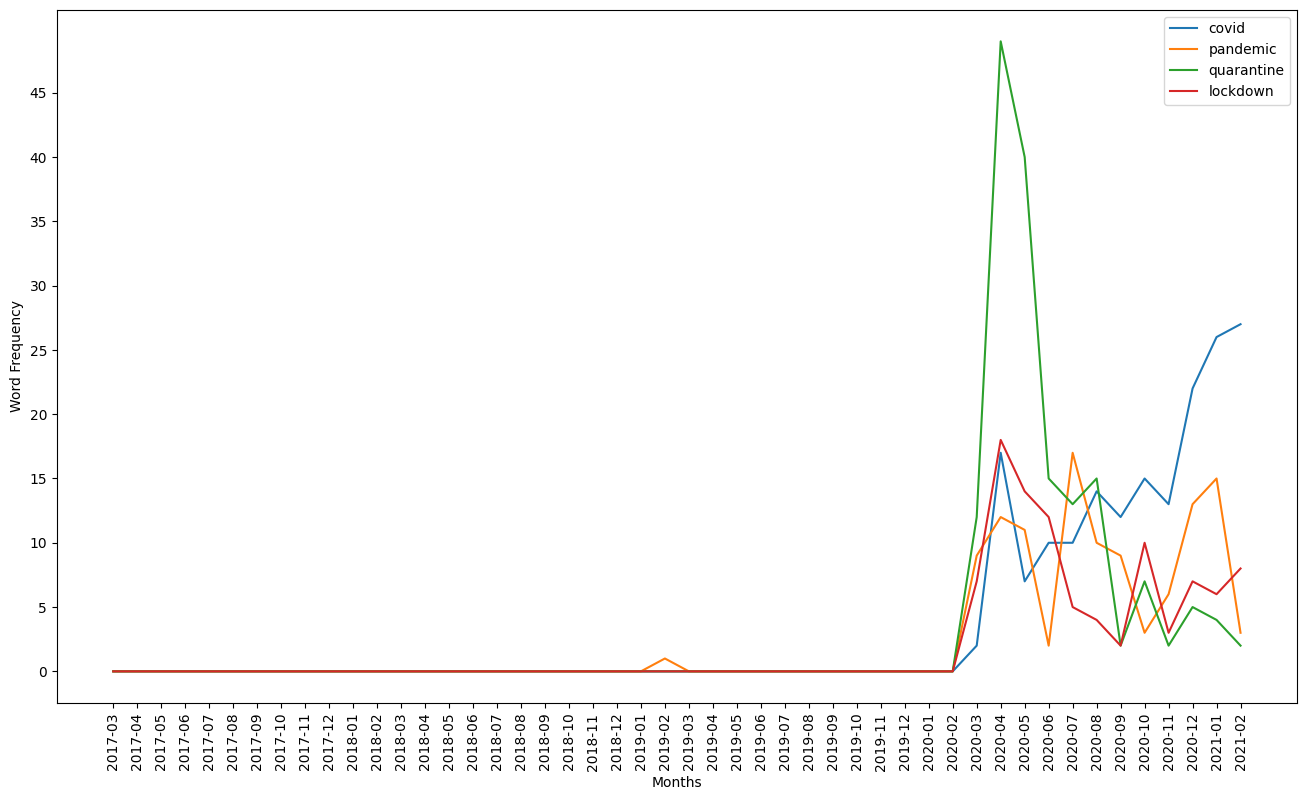

<Figure size 640x480 with 0 Axes>

In [34]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# month list
months = covdf.Month

# convert the column to categorical and ordered
covdf.Month= pd.Categorical(covdf.Month, categories=months, ordered=True)

x = covdf.Month
y = covdf.covid
y2= covdf.pandemic
y3= covdf.quarantine
y4 = covdf.lockdown
y5 = covdf.benadryl
y6 = covdf.health

plt.figure(figsize=(16,9))

# plot lines
plt.plot(x, y, label = "covid", linestyle="-")
plt.plot(x, y2, label = "pandemic", linestyle="-")
plt.plot(x, y3, label = "quarantine", linestyle="-")
plt.plot(x, y4, label = "lockdown", linestyle="-")
#plt.plot(x, y5, label = "benadryl", linestyle="-")
#plt.plot(x, y6, label = "health", linestyle="-")

plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

plt.xlabel("Months")
plt.ylabel("Word Frequency")
plt.yticks(np.arange(0, max(covdf['quarantine']), 5))

plt.legend()
plt.show()

plt.savefig('LINEGRAPH4.png')

In [86]:
gendf.columns

Index(['Month', 'awwords', 'numpost', 'totalwords'], dtype='object')

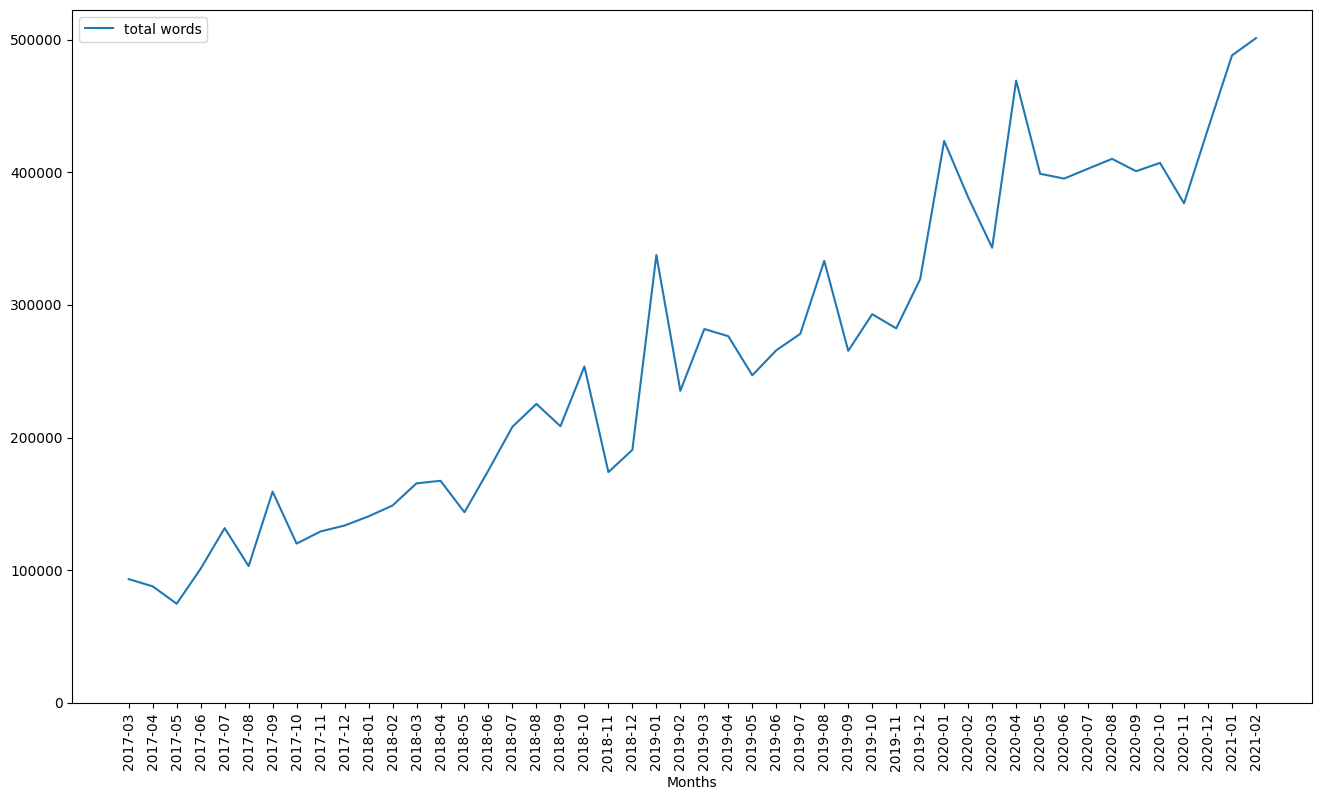

In [98]:
# month list
months = gendf.Month

# convert the column to categorical and ordered
gendf.Month= pd.Categorical(gendf.Month, categories=months, ordered=True)

x = gendf.Month
y2= gendf.awwords
y3= gendf.numpost
y4 = gendf.totalwords


plt.figure(figsize=(16,9))

# plot lines
#plt.plot(x, y2, label = "Number of Words Average", linestyle="-")
#plt.plot(x, y3, label = "Number of Posts", linestyle="-")
plt.plot(x, y4, label = "total words", linestyle="-")


plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

plt.xlabel("Months")
#plt.ylabel("Word Frequency")
plt.yticks(np.arange(0, max(gendf['totalwords']), 100000))

plt.legend()
plt.show()

In [ ]:
#plt.plot(x, y5, label = "benadryl", linestyle="-")
#plt.plot(x, y6, label = "health", linestyle="-")
otherdf['benadryl'] = covdf['benadryl']
otherdf['health']= covdf['health']

In [ ]:
otherdf.describe()

,avwords,totalwords,covid,anxious,anxiety,depression,depressed,afraid,scared,fear,...,seroquel,xanax,helpp,feel,hope,insomnia,sleep,awake,benadryl,health
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,706.062500,262065.458333,3.645833,25.729167,97.083333,21.625000,9.104167,11.375000,20.083333,14.812500,...,12.479167,8.895833,128.916667,201.666667,24.916667,209.729167,873.854167,87.916667,13.166667,18.291667
std,83.780718,121176.707996,7.332497,15.505304,52.582188,11.117602,5.231816,7.791498,13.495205,9.366432,...,8.292497,5.691500,62.967007,105.031167,14.092149,93.422568,417.956935,42.127887,7.075079,12.902182
min,588.000000,74714.000000,0.000000,5.000000,0.000000,1.000000,1.000000,2.000000,3.000000,2.000000,...,1.000000,1.000000,16.000000,52.000000,2.000000,52.000000,255.000000,21.000000,2.000000,0.000000
25%,647.250000,156581.250000,0.000000,11.000000,58.250000,13.500000,5.000000,6.000000,9.750000,7.750000,...,6.750000,5.000000,71.500000,103.500000,14.750000,131.250000,525.250000,51.500000,7.000000,7.000000
50%,698.000000,259451.000000,0.000000,24.500000,89.000000,21.500000,8.500000,8.000000,18.000000,14.000000,...,10.500000,7.000000,132.000000,193.000000,22.500000,205.500000,861.000000,82.000000,13.000000,15.500000
75%,764.000000,377680.000000,0.500000,38.500000,148.000000,29.250000,13.000000,15.250000,28.500000,20.000000,...,15.500000,12.000000,172.250000,295.500000,33.500000,293.500000,1205.750000,127.000000,17.250000,27.000000
max,1020.000000,501038.000000,27.000000,58.000000,209.000000,45.000000,20.000000,36.000000,62.000000,39.000000,...,34.000000,24.000000,272.000000,424.000000,57.000000,396.000000,1770.000000,162.000000,30.000000,52.000000


In [ ]:
otherdf['anx'] = otherdf['anxiety'] + otherdf['anxious']
otherdf['dep'] = otherdf['depression'] + otherdf['depressed']
otherdf['fear4'] = otherdf['afraid'] + otherdf['scared'] + otherdf['fear'] + otherdf['worry']
otherdf['stre'] = otherdf['stress'] + otherdf['stressed'] + otherdf['stressful']

### NUMBER OF TIMES A WORD GROUP APPEARS IN A MONTH / AVERAGE WORDS ON THAT MONTH
#SO FINDING THE % OF THAT WORD APPEARING PER MONTH

otherdf['anx2'] = (100 * otherdf['anx'])/ (otherdf['totalwords'])
otherdf['dep2'] = (100 * otherdf['dep'])/ (otherdf['totalwords'])
otherdf['fear42'] = (100 * otherdf['fear4'])/ (otherdf['totalwords'])
otherdf['stre2'] = (100 * otherdf['stre'])/(otherdf['totalwords'])
otherdf['sleep2'] = (100 * otherdf['sleep'])/(otherdf['totalwords'])
otherdf['health2'] = (100 * otherdf['health'])/(otherdf['totalwords'])
otherdf['insomnia2'] = (100 * otherdf['insomnia'])/(otherdf['totalwords'])

In [ ]:
otherdf['health2']

0     0.004290
1     0.010249
2     0.000000
3     0.007912
4     0.004557
5     0.006792
6     0.004397
7     0.006666
8     0.005418
9     0.015712
10    0.004980
11    0.005378
12    0.002418
13    0.004182
14    0.002784
15    0.005704
16    0.007688
17    0.002663
18    0.007194
19    0.003944
20    0.003450
21    0.007343
22    0.008590
23    0.003826
24    0.008518
25    0.006151
26    0.002835
27    0.007150
28    0.006112
29    0.007804
30    0.004899
31    0.006485
32    0.003543
33    0.005948
34    0.007083
35    0.006823
36    0.006121
37    0.005756
38    0.008275
39    0.010123
40    0.008196
41    0.008536
42    0.006738
43    0.008845
44    0.011420
45    0.008320
46    0.009426
47    0.010378
Name: health2, dtype: float64

In [ ]:
otherdf.describe()

,avwords,totalwords,covid,anxious,anxiety,depression,depressed,afraid,scared,fear,...,awake,anx,dep,fear4,stre,anx2,dep2,fear42,stre2,sleep2
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,706.062500,262065.458333,3.645833,25.729167,97.083333,21.625000,9.104167,11.375000,20.083333,14.812500,...,87.916667,122.812500,30.729167,58.770833,39.270833,0.044943,0.012139,0.021381,0.014935,0.332494
std,83.780718,121176.707996,7.332497,15.505304,52.582188,11.117602,5.231816,7.791498,13.495205,9.366432,...,42.127887,66.610221,15.126051,34.774801,19.581515,0.009201,0.004446,0.004647,0.002955,0.020474
min,588.000000,74714.000000,0.000000,5.000000,0.000000,1.000000,1.000000,2.000000,3.000000,2.000000,...,21.000000,5.000000,8.000000,11.000000,8.000000,0.005363,0.005527,0.009165,0.007395,0.286147
25%,647.250000,156581.250000,0.000000,11.000000,58.250000,13.500000,5.000000,6.000000,9.750000,7.750000,...,51.500000,72.500000,16.750000,31.000000,23.500000,0.041259,0.009754,0.018613,0.012984,0.317050
50%,698.000000,259451.000000,0.000000,24.500000,89.000000,21.500000,8.500000,8.000000,18.000000,14.000000,...,82.000000,114.500000,29.000000,53.000000,36.500000,0.045596,0.011819,0.021222,0.014850,0.335012
75%,764.000000,377680.000000,0.500000,38.500000,148.000000,29.250000,13.000000,15.250000,28.500000,20.000000,...,127.000000,183.500000,39.500000,79.000000,51.500000,0.051709,0.013391,0.024529,0.016995,0.348593
max,1020.000000,501038.000000,27.000000,58.000000,209.000000,45.000000,20.000000,36.000000,62.000000,39.000000,...,162.000000,257.000000,62.000000,151.000000,88.000000,0.057146,0.034549,0.032193,0.021986,0.370337


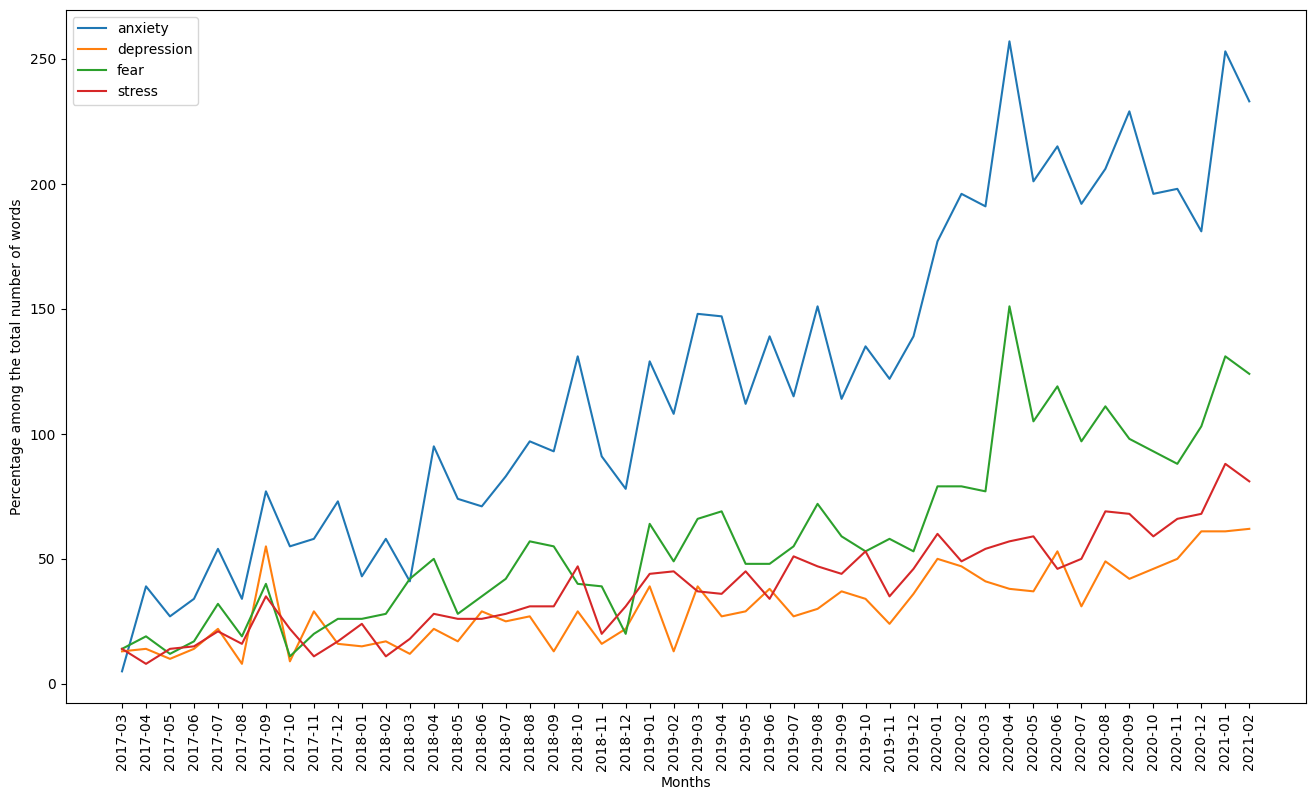

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# month list
months = covdf.Month

# convert the column to categorical and ordered
otherdf.Month= pd.Categorical(covdf.Month, categories=months, ordered=True)

x = otherdf.Month
y2= otherdf.anx
y3 = otherdf.dep
y4 = otherdf.fear4
y5 = otherdf.stre

y12 = otherdf.ambien
y13 = otherdf.seroquel
y14 = otherdf.xanax
y15 = otherdf.helpp
#y18 = otherdf.advice
#y20 = otherdf.mental
y21 = otherdf.insomnia
y22 = otherdf.sleep
y23 = otherdf.awake



plt.figure(figsize=(16,9))

# plot lines
plt.plot(x, y2, label = "anxiety", linestyle="-")
plt.plot(x, y3, label = "depression", linestyle="-")
plt.plot(x, y4, label = "fear", linestyle="-")
plt.plot(x, y5, label = "stress", linestyle="-")
#plt.plot(x, y6, label = "ambien", linestyle="-")

plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

plt.xlabel("Months")
plt.ylabel("Percentage among the total number of words")
#plt.yticks(np.arange(0, max(otherdf['anx']), 20))

plt.legend()
plt.show()


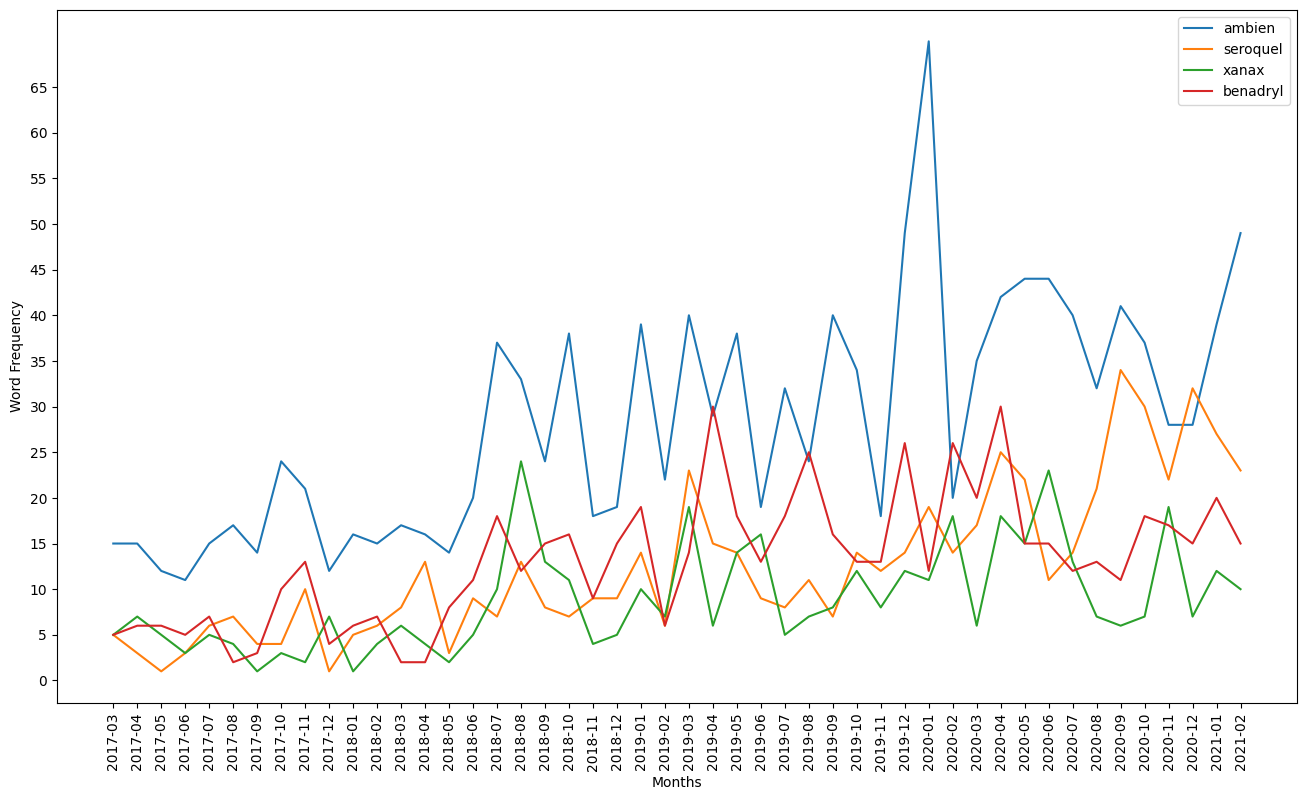

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# month list
months = covdf.Month

# convert the column to categorical and ordered
otherdf.Month= pd.Categorical(covdf.Month, categories=months, ordered=True)

x = otherdf.Month
y2 = otherdf.ambien
y3 = otherdf.seroquel
y4 = otherdf.xanax
y5 = otherdf.benadryl
y6 = otherdf.health
y7 = otherdf.sleep


#y20 = otherdf.mental
y21 = otherdf.insomnia
y22 = otherdf.sleep
y23 = otherdf.awake


plt.figure(figsize=(16,9))

# plot lines
plt.plot(x, y2, label = "ambien", linestyle="-")
plt.plot(x, y3, label = "seroquel", linestyle="-")
plt.plot(x, y4, label = "xanax", linestyle="-")
plt.plot(x, y5, label = "benadryl", linestyle="-")
#plt.plot(x, y6, label = "advice", linestyle="-")


plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

plt.xlabel("Months")
plt.ylabel("Word Frequency")
plt.yticks(np.arange(0, max(otherdf['ambien']), 5))

plt.legend()
plt.show()

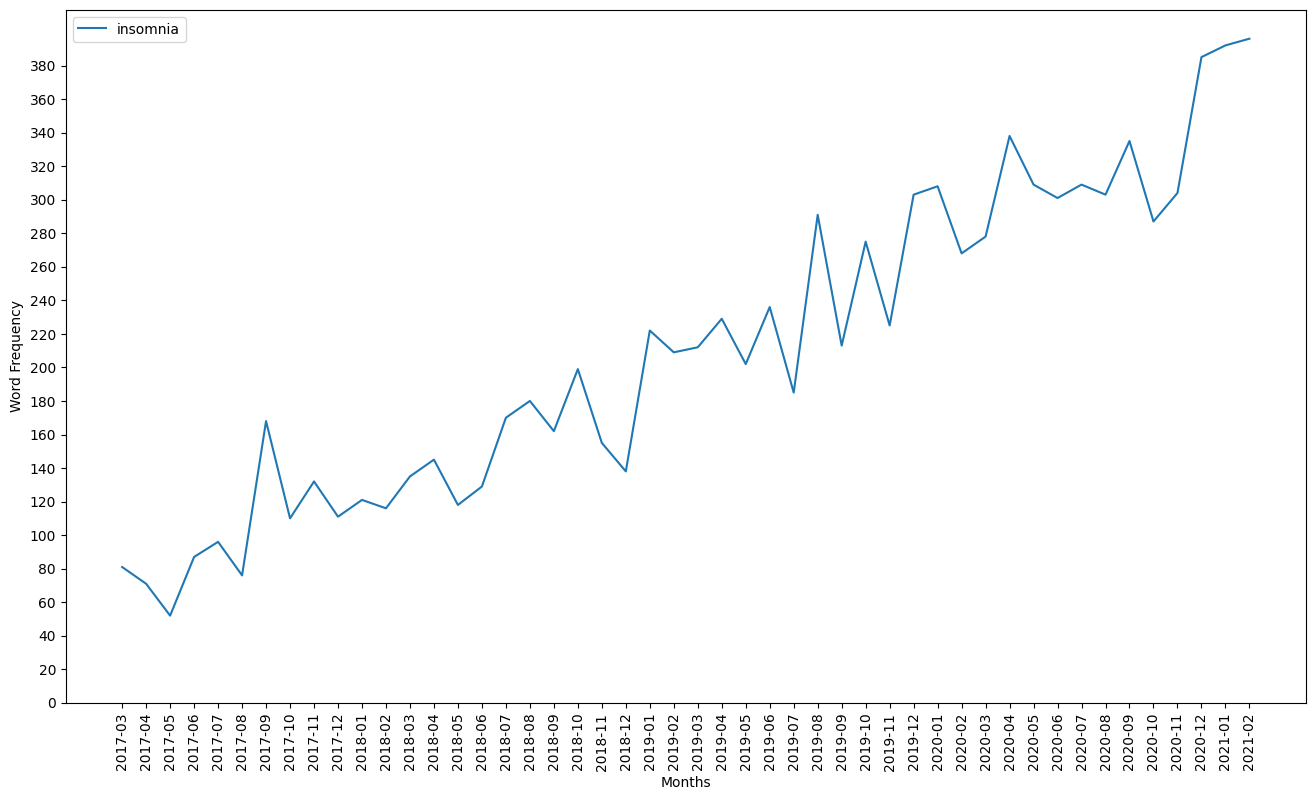

In [ ]:
plt.figure(figsize=(16,9))


y6 = otherdf.health
y7 = otherdf.sleep
y8 = otherdf.insomnia

plt.plot(x, y8, label = "insomnia", linestyle="-")
#plt.plot(x, y7, label = "sleep", linestyle="-")
#plt.plot(x, y6, label = "health", linestyle="-")


plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

plt.xlabel("Months")
plt.ylabel("Word Frequency")
plt.yticks(np.arange(0, max(otherdf['insomnia']), 20))

plt.legend()
plt.show()

In [ ]:

'''otherdf['insomnia2'] = otherdf['insomnia']/otherdf['lens']
otherdf['sleep2'] = otherdf['sleep']/otherdf['lens']
otherdf['awake2'] = otherdf['awake']/otherdf['lens']


#y2 = otherdf.mental
y3 = otherdf.insomnia2
y4 = otherdf.sleep2
y5 = otherdf.awake2


plt.figure(figsize=(16,9))


# plot lines
#plt.plot(x, y2, label = "mental", linestyle="-")
plt.plot(x, y3, label = "insomnia", linestyle="-")
plt.plot(x, y4, label = "sleep", linestyle="-")
plt.plot(x, y5, label = "awake", linestyle="-")


plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

plt.xlabel("Months")
plt.ylabel("Word Frequency")
plt.yticks(np.arange(0, max(otherdf.insomnia), 50))

plt.legend()
plt.show()'''

'otherdf[\'insomnia2\'] = otherdf[\'insomnia\']/otherdf[\'lens\']\notherdf[\'sleep2\'] = otherdf[\'sleep\']/otherdf[\'lens\']\notherdf[\'awake2\'] = otherdf[\'awake\']/otherdf[\'lens\']\n\n\n#y2 = otherdf.mental\ny3 = otherdf.insomnia2\ny4 = otherdf.sleep2\ny5 = otherdf.awake2\n\n\nplt.figure(figsize=(16,9))\n\n\n# plot lines\n#plt.plot(x, y2, label = "mental", linestyle="-")\nplt.plot(x, y3, label = "insomnia", linestyle="-")\nplt.plot(x, y4, label = "sleep", linestyle="-")\nplt.plot(x, y5, label = "awake", linestyle="-")\n\n\nplt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees\n\nplt.xlabel("Months")\nplt.ylabel("Word Frequency")\nplt.yticks(np.arange(0, max(otherdf.insomnia), 50))\n\nplt.legend()\nplt.show()'

In [ ]:
otherdf.columns

Index(['Month', 'covid', 'anxious', 'anxiety', 'depression', 'depressed',
       'afraid', 'scared', 'fear', 'worry', 'stress', 'stressed', 'ambien',
       'seroquel', 'xanax', 'helpp', 'feel', 'hope', 'advice', 'safe',
       'mental', 'insomnia', 'sleep', 'awake'],
      dtype='object')

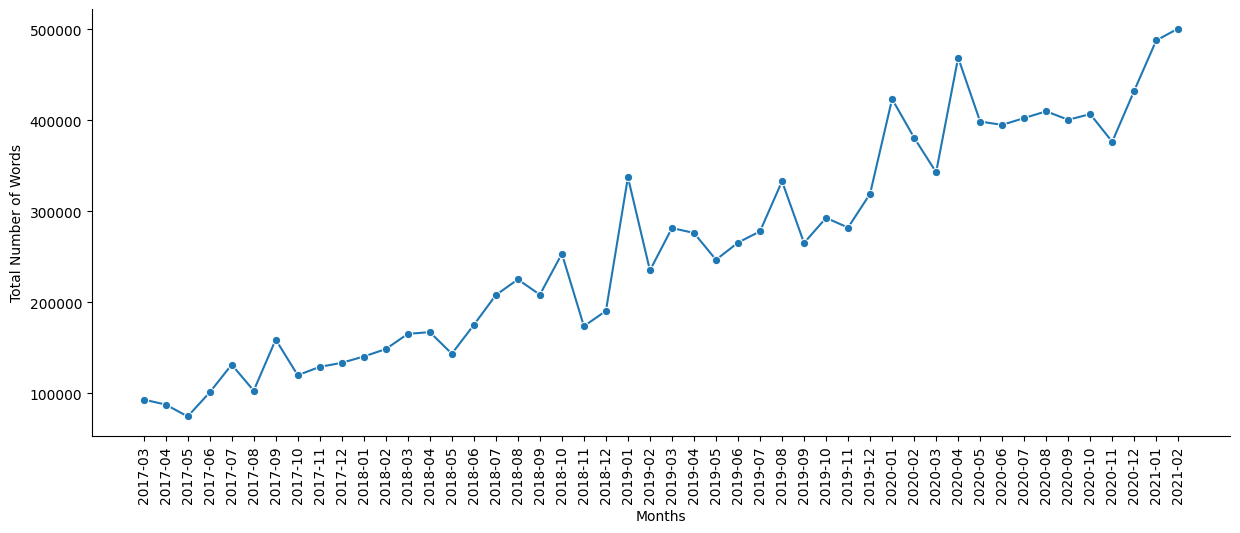

In [ ]:
import pandas as pd
import seaborn as sns
from calendar import month_name as mn

# month list
months = otherdf.Month

# convert the column to categorical and ordered
otherdf.Month= pd.Categorical(otherdf.Month, categories=months, ordered=True)

x = otherdf.Month
y = otherdf.totalwords
y2= covdf.pandemic
y3= covdf.quarantine
y4 = covdf.lockdown
y5 = covdf.benadryl
y6 = covdf.health


# plot the data
#p = sns.relplot(kind='line', data=covdf, x='Month', y='covid', aspect=2.5, marker='o')

# plot lines
p = sns.relplot(kind='line', data=otherdf, x='Month', y='totalwords', aspect=2.5, marker='o')

p.set_xticklabels(rotation=90)

p.set(xlabel='Months',
       ylabel='Total Number of Words')


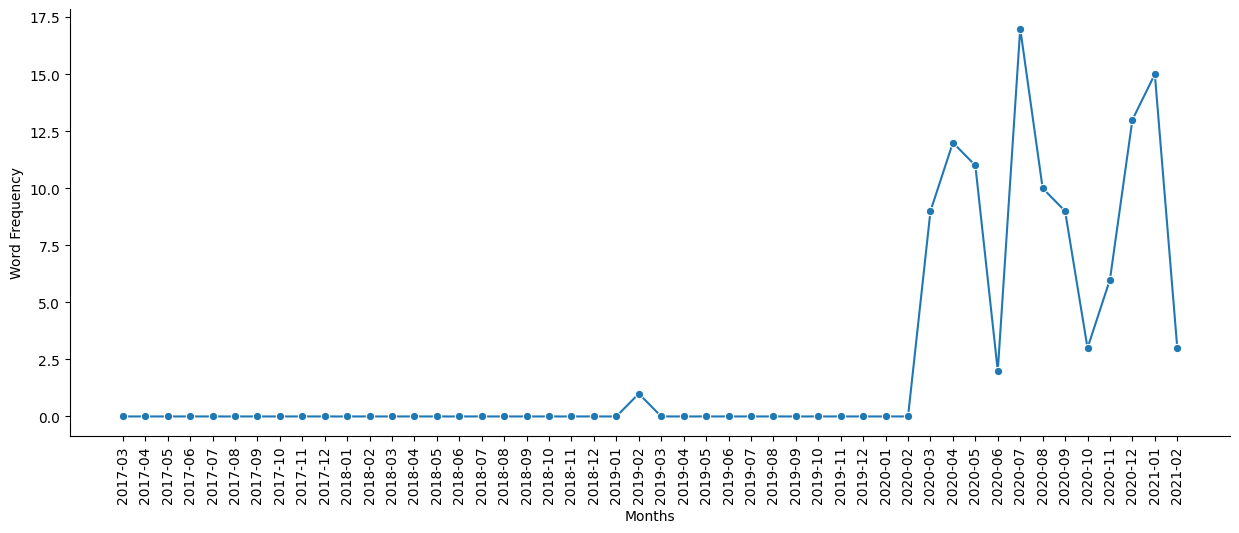

In [ ]:
# plot lines
p = sns.relplot(kind='line', data=covdf, x='Month', y='pandemic', aspect=2.5, marker='o')

p.set_xticklabels(rotation=90)

p.set(xlabel='Months',
       ylabel='Word Frequency')


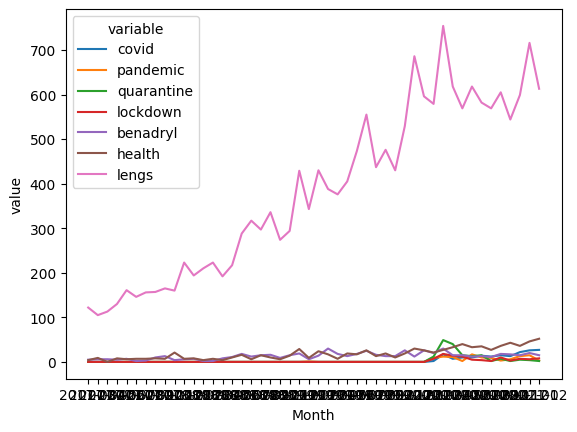

In [ ]:
months = covdf.Month

# convert the column to categorical and ordered
covdf.Month= pd.Categorical(covdf.Month, categories=months, ordered=True)

x = covdf.Month

#plot sales of each store with custom colors
plt = sns.lineplot(x='Month', y='value', hue='variable',
             data=pd.melt(covdf, ['Month']))


#plt.set_xticklabels(plt.get_xticklabels(), rotation=45)

In [ ]:
months = covdf.Month

# convert the column to categorical and ordered
covdf2.Month= pd.Categorical(covdf.Month, categories=months, ordered=True)

x = covdf.Month

#plot sales of each store with custom colors
plt = sns.lineplot(x='Month', y='value', hue='variable',
             data=pd.melt(covdf2, ['Month']))


#plt.set_xticklabels(plt.get_xticklabels(), rotation=45)

NameError: ignored

In [ ]:
#(pd.to_datetime(covdf['Month'][i][0:4]  + covdf['Month'][i][5:7], format='%Y%B'))

In [ ]:
'''#covdf["Month"] = pd.to_datetime(covdf["Month"], format = "%d%m%Y")


plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'Month', y = 'covid',data = covdf)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
'''

'#covdf["Month"] = pd.to_datetime(covdf["Month"], format = "%d%m%Y")\n\n\nplt.figure(figsize = (15,8))\nax = sns.barplot(x = \'Month\', y = \'covid\',data = covdf)\nlocs, labels = plt.xticks()\nplt.setp(labels, rotation=45)\n'

In [ ]:
'''import matplotlib.pyplot as plt
import seaborn as sns
# month list
months = covdf.Month

# convert the column to categorical and ordered
covdf.Month= pd.Categorical(covdf.Month, categories=months, ordered=True)

sns.lineplot(data=covdf, x="Month", y="covid")

plt=sns.barplot(data=covdf,  x="Month", y="covid")



plt.set_xticklabels(plt.get_xticklabels(),rotation=90)

plt.set(xlabel='Months',
       ylabel='Word Frequency')
'''

'import matplotlib.pyplot as plt\nimport seaborn as sns\n# month list\nmonths = covdf.Month\n\n# convert the column to categorical and ordered\ncovdf.Month= pd.Categorical(covdf.Month, categories=months, ordered=True)\n\nsns.lineplot(data=covdf, x="Month", y="covid")\n\nplt=sns.barplot(data=covdf,  x="Month", y="covid")\n\n\n\nplt.set_xticklabels(plt.get_xticklabels(),rotation=90)\n\nplt.set(xlabel=\'Months\',\n       ylabel=\'Word Frequency\')\n'

<ipython-input-52-de12443dd034>:1: UserWarning: 
The palette list has fewer values (4) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='year', y='value', hue='variable',


TypeError: ignored

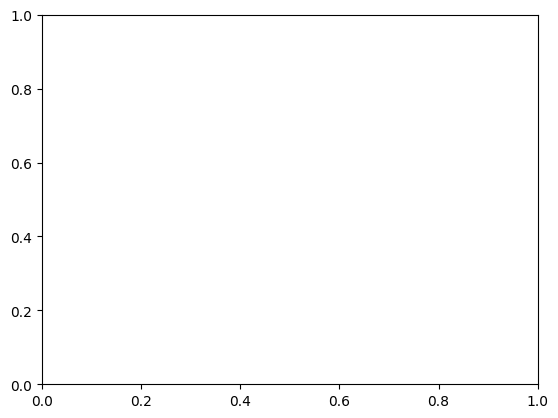

In [ ]:
sns.lineplot(x='year', y='value', hue='variable',
             data=pd.melt(df, ['year']),
             palette=['red', 'blue', 'purple', 'pink'])

In [ ]:
covdf2 = covdf.drop(axis=0, columns=['benadryl', 'health'], inplace=False)

<Axes: >

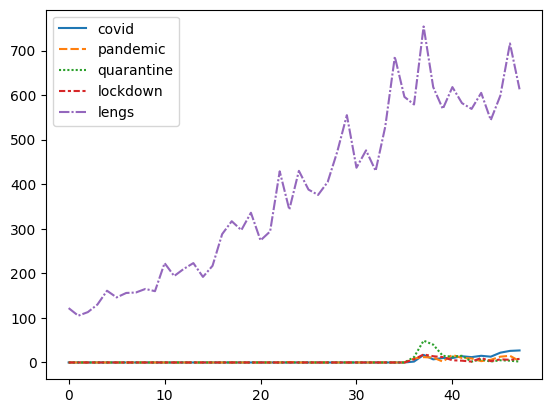

In [ ]:
# month list
months = covdf.Month

# convert the column to categorical and ordered
covdf.Month= pd.Categorical(covdf.Month, categories=months, ordered=True)

sns.lineplot(data=covdf2)

<Axes: xlabel='Month', ylabel='covid'>

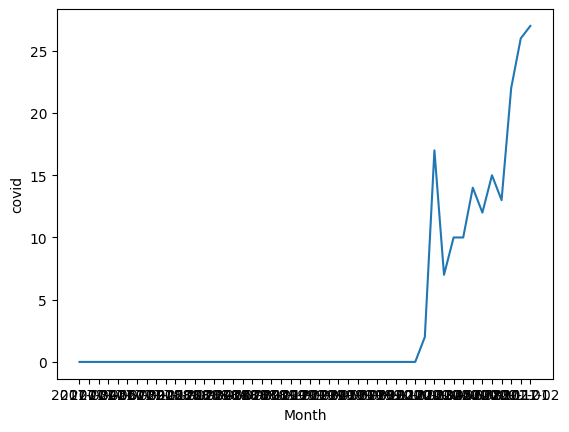

In [ ]:
sns.lineplot(data=covdf, x="Month", y="covid")

<AxesSubplot:xlabel='Month', ylabel='covid'>

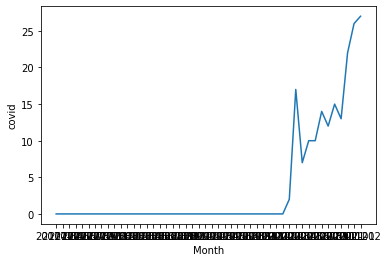

In [ ]:
# month list
months = covdf.Month

# convert the column to categorical and ordered
covdf.Month= pd.Categorical(covdf.Month, categories=months, ordered=True)

sns.lineplot(data=covdf, x="Month", y="covid")

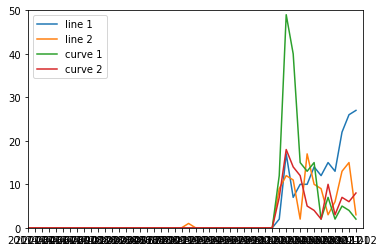

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# month list
#months = covdf.Month

# convert the column to categorical and ordered
#covdf.Month= pd.Categorical(covdf.Month, categories=months, ordered=True)
x = covdf.Month
y = covdf.covid
y2= covdf.pandemic
y3= covdf.quarantine
y4 = covdf.lockdown
y5 = covdf.benadryl
y6 = covdf.health

fig, ax = plt.subplots()
ax.set_xlim(0, 48)
ax.set_ylim(0, 50)

# plot lines
plt.plot(x, y, label = "line 1")
plt.plot(x, y2, label = "line 2")
plt.plot(x, y3, label = "curve 1")
plt.plot(x, y4, label = "curve 2")
plt.legend()
plt.show()


In [ ]:
''''medicated, pessimistic, skeptic, movement, insomniac, suboxone, worsening, suvorexant, homeopathic, unsafe,
mediation, weary, hungover, dollar, claritin, propiomazin, cannabinoid, delirium, dopamine, maniac, sleeplesness,
euphoric, negativity, sominex, overdose, lonely, drunk, amphetamine, undiagnosed, mortality, job, stressfull,
emotion, panic, freaked, adderall
''''

In [ ]:
'''import pandas as pd
import seaborn as sns
from calendar import month_name as mn

# month list
months = m

# convert the column to categorical and ordered
m= pd.Categorical(m, categories=months, ordered=True)

# plot the data
p = sns.relplot(kind='line', data=c, x='ym', y='count', aspect=2.5, marker='o')
p.set_xticklabels(rotation=90)

p.set(xlabel='Months',
       ylabel='Number of posts')'''

"import pandas as pd\nimport seaborn as sns\nfrom calendar import month_name as mn\n\n# month list\nmonths = m\n\n# convert the column to categorical and ordered\nm= pd.Categorical(m, categories=months, ordered=True)\n\n# plot the data\np = sns.relplot(kind='line', data=c, x='ym', y='count', aspect=2.5, marker='o')\np.set_xticklabels(rotation=90)\n\np.set(xlabel='Months',\n       ylabel='Number of posts')"

In [ ]:
'''before

bed 4009
feel 4985
insomnia 5554
asleep 5820
time 6044
day 6418
get 6907
like 7084
hour 7742
night 9239
sleep 22060


after

know 3275
bed 3304
sleeping 3411
fall 3493
insomnia 4513
feel 4695
time 5220
asleep 5433
day 5536
get 5886
hour 6531
like 6604
night 7807
sleep 19885'''

In [ ]:
'''text = a1.text

wordfreq = {}
for sentence in text:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

wordfreq = {k:v for k,v in wordfreq.items() if v >= 50} # if v >= 50'''

In [ ]:
'''def makedic(text):
    wordfreq = {}
    for sentence in text:
        tokens = nltk.word_tokenize(sentence)
        for token in tokens:
            if token not in wordfreq.keys():
                wordfreq[token] = 1
            else:
                wordfreq[token] += 1
    wordfreq = {k:v for k,v in wordfreq.items() if v >=50}
    return wordfreq '''

In [ ]:
'''from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

def count(text):
    wordfreq = {}
    for sentence in text:
        tokens = nltk.word_tokenize(sentence)
        for token in tokens:
            if token not in wordfreq.keys():
                wordfreqtest[token] = 1
            else:
                wordfreq[token] += 1

    wordfreq = {k:v for k,v in wordfreq.items()}
    return wordfreq'''

In [ ]:
'''
#1-121, 122-226, 227-339 , 340-469, 470-630, 631-776, 777- 932, 933-1089, 1090-1254, 1255-1414, 1415-1637, 1638-1831
#1831-2041, 2042-2264, 2265-2456, 2457-2673, 2674-2961, 2962-3278, 3279-3575, 3576-3911, 3912-4185, 4186-4479,
4480-4908, 4909-5251, 5252-5681, 5682-6069, 6070-6445, 6446-6850, 6851-7323, 7324-7878, 7879-8315, 8316-8791,
8792-9221, 9222-9750, 9751-10436, 10437-11032, 11033-11611, 11612-12365, 12366-12983, 12984-13552, 13553-14170,
14171-14752, 14753-15321, 15322-15926, 15927-16470, 16471-17069, 17070-17785, 17786-18399'''

'\n#1-121, 122-226, 227-339 , 340-469, 470-630, 631-776, 777- 932, 933-1089, 1090-1254, 1255-1414, 1415-1637, 1638-1831\n#1831-2041, 2042-2264, 2265-2456, 2457-2673, 2674-2961, 2962-3278, 3279-3575, 3576-3911, 3912-4185, 4186-4479, \n4480-4908, 4909-5251, 5252-5681, 5682-6069, 6070-6445, 6446-6850, 6851-7323, 7324-7878, 7879-8315, 8316-8791,\n8792-9221, 9222-9750, 9751-10436, 10437-11032, 11033-11611, 11612-12365, 12366-12983, 12984-13552, 13553-14170, \n14171-14752, 14753-15321, 15322-15926, 15927-16470, 16471-17069, 17070-17785, 17786-18399'

In [ ]:
'''c = (df.groupby(['ym']).size())
c.to_frame()
c = pd.DataFrame(c)
print(type(c))
c = c.reset_index(drop=False)
c.columns =['ym', 'count']
c'''

"c = (df.groupby(['ym']).size())\nc.to_frame()\nc = pd.DataFrame(c)\nprint(type(c))\nc = c.reset_index(drop=False)\nc.columns =['ym', 'count']\nc"

<Axes: xlabel='ym'>

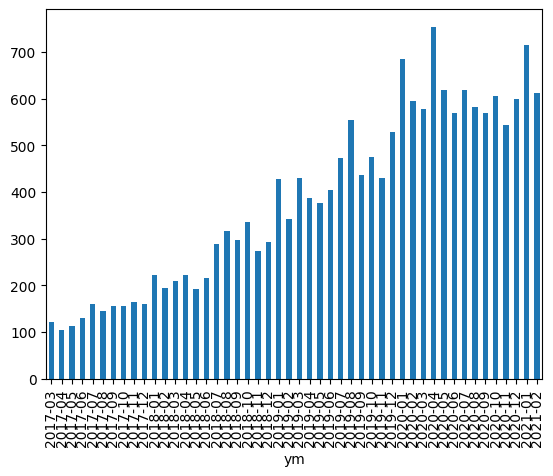

In [ ]:
df.groupby(['ym']).size().plot(kind='bar', legend=None)

<AxesSubplot:xlabel='y,ym'>

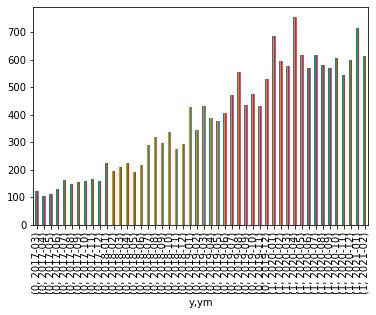

In [ ]:
df.groupby(['y', 'ym']).count().plot(kind='bar', legend=None)

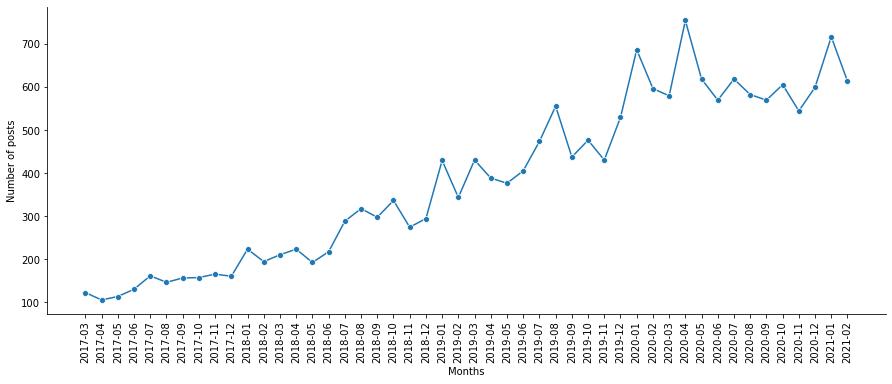

In [ ]:
'''import pandas as pd
import seaborn as sns
from calendar import month_name as mn

# month list
months = c.ym

# convert the column to categorical and ordered
c.ym= pd.Categorical(c.ym, categories=months, ordered=True)

# plot the data
p = sns.relplot(kind='line', data=c, x='ym', y='count', aspect=2.5, marker='o')
p.set_xticklabels(rotation=90)

p.set(xlabel='Months',
       ylabel='Number of posts')'''

In [ ]:
#df.groupby(['y', 'ym']).size().reset_index(name='counts')

In [ ]:
# Groupby by country
cov = df.groupby("y")

# Summary statistic of all countries
cov.describe().head()

score                                                 
    count       mean        std  min  25%  50%  75%    max
y                                                         
0  9751.0   8.626192  18.943615  0.0  2.0  3.0  7.0  446.0
1  8648.0  11.304348  30.470936  0.0  1.0  3.0  6.0  581.0

In [ ]:
grouped = d.groupby(['y'])
b = grouped.get_group(0)
a = grouped.get_group(1)
a.text


before = " ".join(t for t in b.text)
print ("There are {} words in the combination of all review.".format(len(before)))
after = " ".join(t for t in a.text)
print ("There are {} words in the combination of all review.".format(len(after)))

#no stopwords

'''There are 4047576 words in the combination of all review.
There are 3481707 words in the combination of all review.'''

There are 4047576 words in the combination of all review.
There are 3481707 words in the combination of all review.


'There are 4047576 words in the combination of all review.\nThere are 3481707 words in the combination of all review.'

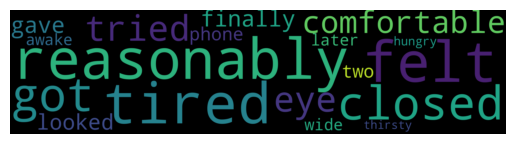

In [ ]:
# Start with one review:
text = d.text[1]

stopwords = set(STOPWORDS)
stopwords.update(["asleep", 'bed',"sleep", 'know', 'hour', 'think', 'help', 'try',"fall", 'day', 'night', 'feel','work', 'even', 'one', 'time', 'really'])

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, max_words=100, height= 1000, width=4000).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


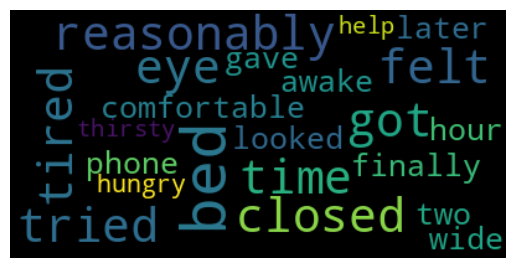

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:
# background_color="white"
wordcloud = WordCloud(max_font_size=50, max_words=100).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Save the image in the img folder:
wordcloud.to_file("img/first_review.png")

9751     wide awake two hour falling asleep took ambien...
9752     stop cry need sleep mentally physically matter...
9753     laying since whole day going ruined either wak...
9754     happy new year night aaaackkkk people supposed...
9755     third day small amount sleep hour per body ach...
                               ...                        
18394    day many time incredible moodiness overwhelmin...
18395    hi everyone new poster sub trying see anyone e...
18396    hard time falling asleep exhausted cant switch...
18397    anyone else rly want sleep feel tired get anxi...
18398    fella around time last year first bout insomni...
Name: text, Length: 8648, dtype: string

In [ ]:
#d.groupby('ym', sort=False)['text'].rank(ascending=False)

There are 4047576 words in the combination of all review.
There are 3481707 words in the combination of all review.


In [ ]:
'''li = []
for i in range (0, 48):
    li.append([m[i], mon.get_group(str(m[i])).text])
   # print(months[i] , mon.get_group(str(months[i])).text)
    #print(m , mon.get_group(str(m)).text)

    #dic = {m: " ".join(t for t in mon.get_group(str(m)).text) }'''

'li = []\nfor i in range (0, 48):\n    li.append([m[i], mon.get_group(str(m[i])).text])\n   # print(months[i] , mon.get_group(str(months[i])).text)\n    #print(m , mon.get_group(str(m)).text)\n    \n    #dic = {m: " ".join(t for t in mon.get_group(str(m)).text) }'

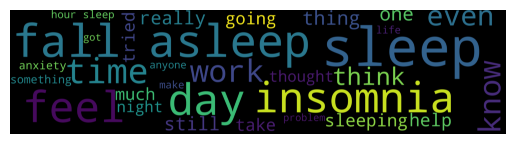

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["asleep",'thing','every', 'well', 'got', 'need','anyone','sometime', 'thought', 'able', 'alway', 'tried', 'something', 'last', 'make', 'wake', 'seem', 'back', 'want', 'going', 'go', 'take', 'still', "sleep", 'know', 'hour', 'think', 'help', 'try',"fall", 'day', 'night', 'feel','work', 'even', 'one', 'time', 'really'])

# Generate a word cloud image
#wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(before)
wordcloud = WordCloud(stopwords=stopwords, max_words=30, height= 2000, background_color="black", width=8000).generate(before)
# width=7200, height=3600

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#wordcloud.to_file("Desktop/1SCRAPE DATA/cloud50before.png")

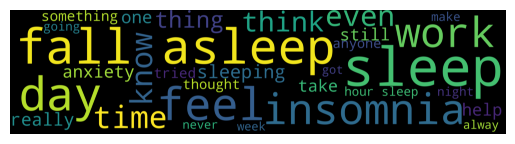

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["asleep",'thing','every', 'well', 'got', 'need','anyone','sometime', 'thought', 'able', 'alway', 'tried', 'something', 'last', 'make', 'wake', 'seem', 'back', 'want', 'going', 'go', 'take', 'still', "sleep", 'know', 'hour', 'think', 'help', 'try',"fall", 'day', 'night', 'feel','work', 'even', 'one', 'time', 'really'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_words=30, height= 2000,  background_color="black", width=8000).generate(after)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
'''Generally, the size of each word in the cloud represents its frequency or importance in the text. Typically,
the more frequently a word appears in the text, the larger it will appear in the word cloud.
Overall, a word cloud can be a useful tool for quickly visualizing the key themes and ideas in a text.
'''